# Proyecto Final
by Matías Moré

In [35]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette(["#024059", "#66D9CD", "#D9923B", "#BF726B", "#401F1F"])



## Dataset Fumadores

Este conjunto de datos consiste en datos biologicos de distintos individuos, recolectados con el objetivo de analizar los efectos y las señales del habito tabaquico. A travez de distintas caracteristicas de estudios de laboratorio como el estado sanguineo, urinario, hepatico, higienico y su relacion con el tabaquismo, se buscara encontrar patrones que determinen biologicamente los parametros a tener en cuenta para identificar a individuos fumadores. Teniendo en cuenta estos datos se realizara una comparacion de estas variables a fin de determinar su utilidad y trascendencia para lograr este fin.

Origen del dataset: https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking?resource=download

### Code Acquisition

In [36]:
smoke_data = pd.read_csv("/workspaces/CoderPosta/Data/smoking.csv")
smoke_data

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


# Analisis de Datos

Se realiza el calculo del Indice de Masa Corporal (IMC)

### Generacion de la variable IMC

In [37]:
df = smoke_data.copy()
df["height(M)"] = df["height(cm)"] / 100
df["IMC"] = df["weight(kg)"] / (df["height(M)"] ** 2)
df



,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking,height(M),IMC
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,0.7,18.0,19.0,27.0,Y,0,Y,0,1.55,24.973985
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,0.6,22.0,19.0,18.0,Y,0,Y,0,1.60,23.437500
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,1.0,21.0,16.0,22.0,Y,0,N,1,1.70,20.761246
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,1.0,19.0,26.0,18.0,Y,0,Y,0,1.65,25.711662
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,0.6,16.0,14.0,22.0,Y,0,N,0,1.55,24.973985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,0.6,14.0,7.0,10.0,Y,1,Y,0,1.70,22.491349
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,0.9,20.0,12.0,14.0,Y,0,Y,0,1.60,19.531250
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,0.5,17.0,11.0,12.0,Y,0,N,0,1.60,19.531250
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,0.7,20.0,19.0,18.0,Y,0,N,0,1.65,22.038567


### Visualizacion IMC

En este gráfico se va a representar la población de fumadores y no fumadores y su distribución de IMC.

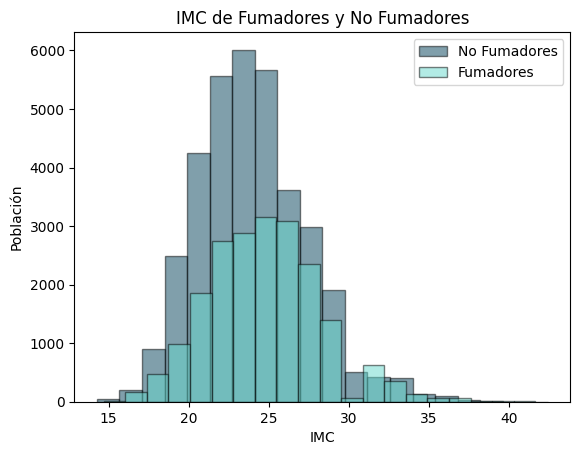

In [38]:
df[df["smoking"] == 0]["IMC"].plot.hist(bins=20, edgecolor="black", alpha = 0.5, label="No Fumadores")
df[df["smoking"] == 1]["IMC"].plot.hist(bins=20, edgecolor="black", alpha = 0.5, label="Fumadores")
plt.xlabel("IMC")
plt.ylabel("Población")
plt.title("IMC de Fumadores y No Fumadores")
plt.legend()
plt.show()


A continuación se representa la prevalencia del tabaquismo según la edad.

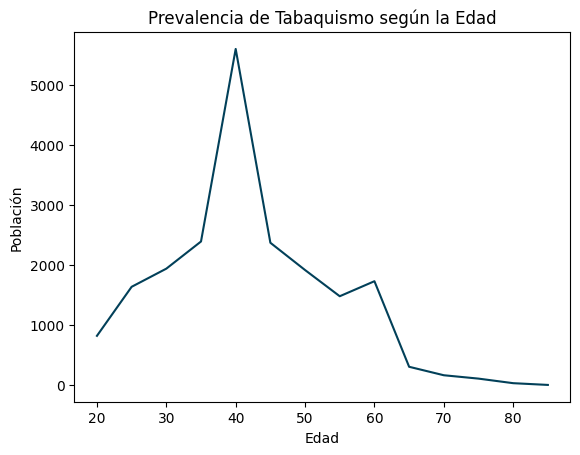

In [39]:
cross_table = pd.crosstab(df["age"], df["smoking"])
plt.plot(cross_table[1])
plt.xlabel("Edad")
plt.ylabel("Población")
plt.title("Prevalencia de Tabaquismo según la Edad")
plt.show()

Se describe las caracteristicas de los datos de estudios visuales de ojo derecho e izquierdo.

In [40]:
df[["eyesight(left)","eyesight(right)"]].describe()

,eyesight(left),eyesight(right)
count,55692.000000,55692.000000
mean,1.012623,1.007443
std,0.486873,0.485964
min,0.100000,0.100000
25%,0.800000,0.800000
50%,1.000000,1.000000
75%,1.200000,1.200000
max,9.900000,9.900000


Se realiza gráfico de correlacion entre ambos ojos para determinar su tendencia y distribución de datos.

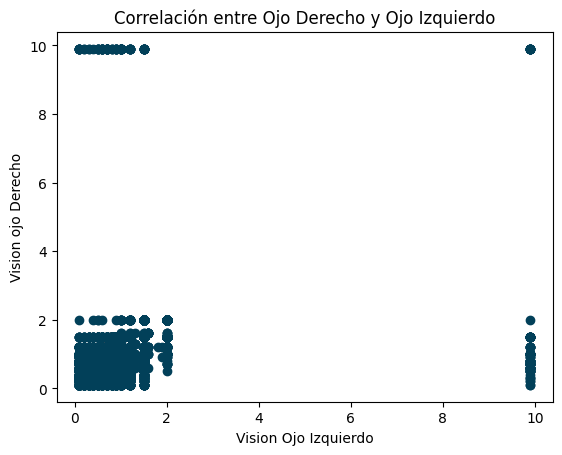

In [41]:
plt.scatter(df["eyesight(left)"], df["eyesight(right)"])
plt.xlabel("Vision Ojo Izquierdo")
plt.ylabel("Vision ojo Derecho")
plt.title("Correlación entre Ojo Derecho y Ojo Izquierdo")
plt.show()


Descripción de colesterol, ldl y hdl.

In [42]:
df[["Cholesterol","HDL","LDL"]].describe()


,Cholesterol,HDL,LDL
count,55692.000000,55692.000000,55692.000000
mean,196.901422,57.290347,114.964501
std,36.297940,14.738963,40.926476
min,55.000000,4.000000,1.000000
25%,172.000000,47.000000,92.000000
50%,195.000000,55.000000,113.000000
75%,220.000000,66.000000,136.000000
max,445.000000,618.000000,1860.000000


Gráfico boxplot para analizar las caracteristicas de los cuartiles entre fumadores y no fumadores.

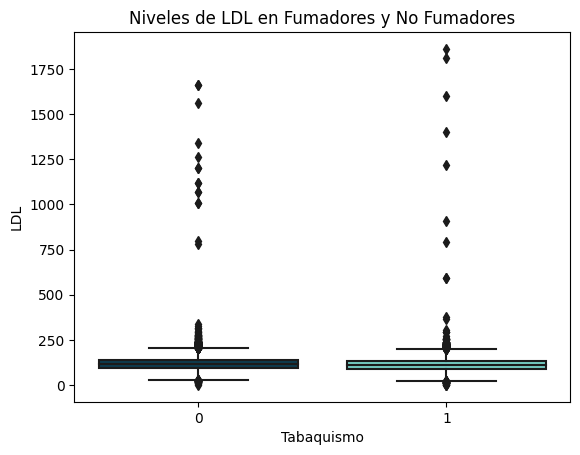

In [57]:
sns.boxplot(x="smoking", y="LDL", data=df)
plt.xlabel("Tabaquismo")
plt.title("Niveles de LDL en Fumadores y No Fumadores")
plt.show()


Análisis correlacional entre presión sistólica y presión diastólica.

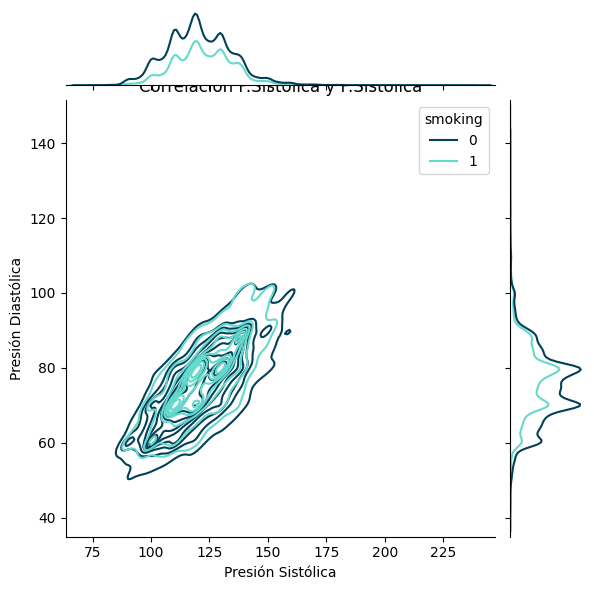

In [70]:
sns.jointplot(data=df, x="systolic", y="relaxation", hue="smoking", kind="kde")
plt.xlabel("Presión Sistólica")
plt.ylabel("Presión Diastólica")
plt.title("Correlación P.Sistólica y P.Sistólica")
plt.show()

Comparación de niveles de hemoglobina en poblacion fumadora y no fumadora.

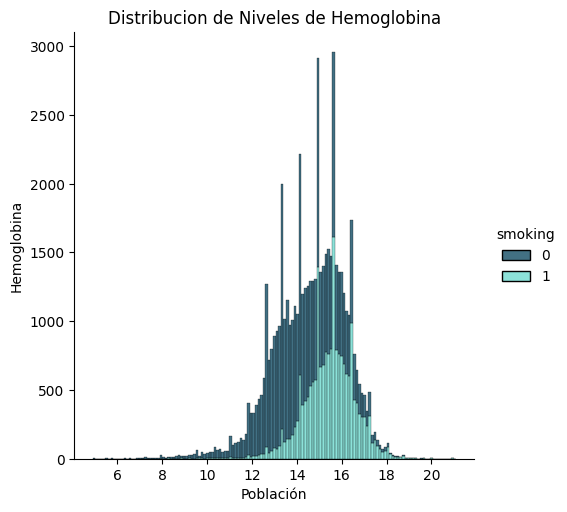

In [69]:
sns.displot(data=df, x="hemoglobin", hue="smoking", multiple="stack")
plt.xlabel("Población")
plt.ylabel("Hemoglobina")
plt.title("Distribucion de Niveles de Hemoglobina")
plt.show()